In [ ]:
# pip install opencv-python

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
from tensorflow.keras.datasets import mnist,fashion_mnist

In [13]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape) # 60000 images with 28*28 as (height and width)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


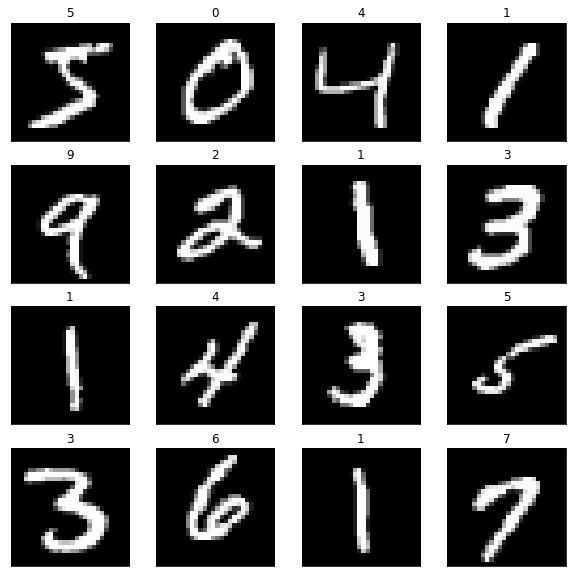

In [16]:
plt.figure(figsize=(10,10))
for i in range(16):  # i=0,1,2,...,15
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],'gray')
    plt.title(y_train[i])
plt.show()

In [17]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [18]:
print(list(set(y_train)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [20]:
print(x_train[7].shape)
print(x_train[7])

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253
  253 253 174   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252
  252 252 252 158  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252
  252 252 252 252  59   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 252 252 230 1

In [21]:
x_train = x_train[:5000,:,:]
x_test = x_test[:1000,:,:]
y_train = y_train[:5000]
y_test = y_test[:1000]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 28, 28)
(1000, 28, 28)
(5000,)
(1000,)


In [22]:
# Normalize
x_train = x_train/255
x_test = x_test/255

# Reshape
x_train = x_train.reshape(5000, 28, 28,1)
x_test = x_test.reshape(1000, 28, 28,1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 28, 28, 1)
(1000, 28, 28, 1)
(5000,)
(1000,)


### Build CNN Architecture

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [24]:
m1 = Sequential()
m1.add(Conv2D(64,(3,3),activation='relu',input_shape=(28, 28, 1)))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Conv2D(32,(3,3),activation='relu'))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Flatten())
m1.add(Dense(32,activation='relu'))
m1.add(Dense(10,activation='softmax'))

m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

In [25]:
m1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [26]:
h1 = m1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=12)

Epoch 1/12
157/157 [==============================] - 9s 49ms/step - loss: 0.8234 - accuracy: 0.7364 - val_loss: 0.3143 - val_accuracy: 0.9010
Epoch 2/12
157/157 [==============================] - 7s 46ms/step - loss: 0.1946 - accuracy: 0.9456 - val_loss: 0.1784 - val_accuracy: 0.9420
Epoch 3/12
157/157 [==============================] - 7s 42ms/step - loss: 0.1221 - accuracy: 0.9624 - val_loss: 0.1481 - val_accuracy: 0.9530
Epoch 4/12
157/157 [==============================] - 6s 38ms/step - loss: 0.0939 - accuracy: 0.9702 - val_loss: 0.1175 - val_accuracy: 0.9640
Epoch 5/12
157/157 [==============================] - 6s 38ms/step - loss: 0.0743 - accuracy: 0.9772 - val_loss: 0.1478 - val_accuracy: 0.9550
Epoch 6/12
157/157 [==============================] - 6s 37ms/step - loss: 0.0531 - accuracy: 0.9846 - val_loss: 0.1128 - val_accuracy: 0.9610
Epoch 7/12
157/157 [==============================] - 6s 37ms/step - loss: 0.0453 - accuracy: 0.9856 - val_loss: 0.0916 - val_accuracy: 0.9680

In [27]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
7,0.035462,0.9900,0.082803,0.972,7
8,0.027163,0.9914,0.089114,0.966,8
9,0.022945,0.9930,0.096691,0.972,9
10,0.019633,0.9928,0.152081,0.960,10
11,0.013924,0.9960,0.091985,0.972,11


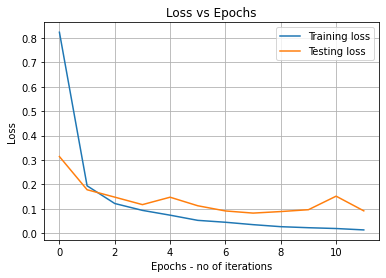

In [28]:
plt.plot(r1['Epochs'],r1['loss'],label='Training loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs - no of iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

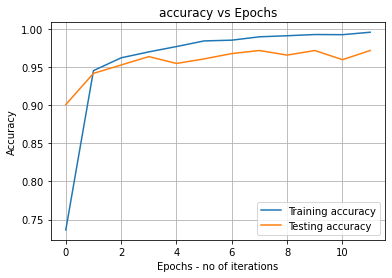

In [29]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Training accuracy')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing accuracy')
plt.title('accuracy vs Epochs')
plt.xlabel('Epochs - no of iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [30]:
print(x_test.shape)

(1000, 28, 28, 1)


In [31]:
ypred = m1.predict(x_test)
print(ypred)

[[8.2751774e-12 2.7913064e-13 6.8127374e-06 ... 9.9992800e-01
  3.7281991e-09 3.3016255e-07]
 [7.0512556e-06 1.3540856e-05 9.9997115e-01 ... 9.8971429e-14
  3.5723698e-08 1.3353862e-15]
 [7.8788194e-09 9.9998879e-01 5.6406060e-07 ... 1.0197286e-05
  1.5569600e-07 1.0873111e-08]
 ...
 [9.9999654e-01 4.2258681e-09 2.4307896e-08 ... 6.2859283e-13
  6.0362099e-10 3.4035381e-06]
 [2.5206084e-06 2.1768876e-09 2.6313228e-07 ... 4.7414815e-06
  9.9989700e-01 9.4349183e-05]
 [1.4076853e-08 4.9179033e-10 1.0511611e-08 ... 5.4611336e-04
  1.4153172e-05 9.9808431e-01]]


In [36]:
print(ypred[7])

[2.0507016e-10 7.1887300e-08 4.0302443e-06 4.0772863e-07 7.1049732e-04
 1.3017892e-05 4.6931290e-09 4.4241096e-07 1.4122603e-04 9.9913031e-01]


In [35]:
print(ypred.shape)

(1000, 10)


In [34]:
print(sum(ypred[50]))
print(sum(ypred[689]))
print(sum(ypred[128]))

1.0000001110425765
1.0000000198071972
0.9999999447585629


In [39]:
ypred_m1 = [np.argmax(i) for i in ypred]
print(ypred_m1)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 0, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [40]:
from sklearn.metrics import confusion_matrix,classification_report

In [42]:
cm = confusion_matrix(y_test,ypred_m1)
print(cm)
print(classification_report(y_test,ypred_m1))

[[ 84   0   0   0   0   0   1   0   0   0]
 [  0 125   0   0   0   0   1   0   0   0]
 [  0   2 111   0   0   0   0   1   2   0]
 [  0   0   0 105   0   2   0   0   0   0]
 [  0   1   0   0 106   0   1   1   0   1]
 [  0   0   0   0   0  85   0   0   1   1]
 [  2   0   0   0   0   0  85   0   0   0]
 [  0   0   1   0   0   0   0  98   0   0]
 [  3   0   2   0   0   0   0   1  82   1]
 [  0   0   0   0   1   0   0   1   1  91]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97        85
           1       0.98      0.99      0.98       126
           2       0.97      0.96      0.97       116
           3       1.00      0.98      0.99       107
           4       0.99      0.96      0.98       110
           5       0.98      0.98      0.98        87
           6       0.97      0.98      0.97        87
           7       0.96      0.99      0.98        99
           8       0.95      0.92      0.94        89
           9       0.97     

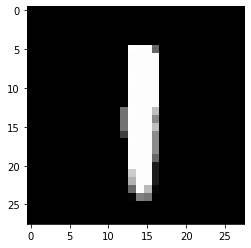

In [45]:
plt.imshow(x_test[345],'gray')
plt.show()

In [56]:
print(x_test.shape)
print(x_test[345].shape)

test_img = x_test[345].reshape(1,28,28,1)
print(test_img.shape)

(1000, 28, 28, 1)
(28, 28, 1)
(1, 28, 28, 1)


In [59]:
res  = m1.predict(x_test[[689]])
print(res)
res_predict = np.argmax(res[0])
res_predict

[[2.0844029e-05 9.1694146e-03 1.2446514e-05 5.9418988e-05 5.1726867e-03
  7.0930313e-05 4.5131343e-09 9.3927354e-01 2.3114852e-05 4.6197645e-02]]


7

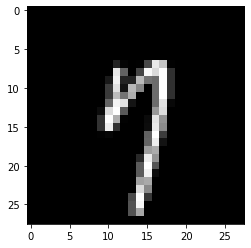

In [55]:
plt.imshow(x_test[689],'gray')
plt.show()

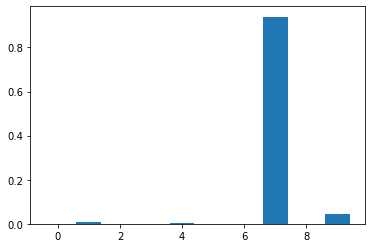

In [58]:
plt.bar(list(range(0,10)),res[0])
plt.show()

In [68]:
# img_index = 0-999
def test_img_pred(img_idx):
    test_img = x_test[img_idx].reshape(1,28,28,1)
    pred = m1.predict(test_img)  # 2D numpy array
    res = np.argmax(pred[0])
    
    plt.subplot(1,2,1)
    plt.imshow(x_test[img_idx],'gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Test Image {img_idx}')
    plt.xlabel(f'Actual Val: {y_test[img_idx]}\nPrediced val {res}')
    
    plt.subplot(1,2,2)
    plt.bar(list(range(10)),pred[0],color='orange')
    plt.xticks(np.arange(10))
    plt.title('Prediction Probability')
    plt.show()
    

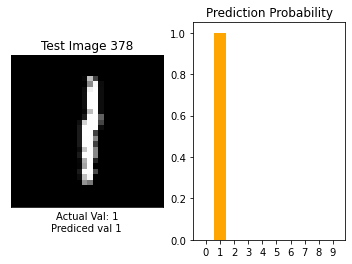

In [70]:
test_img_pred(378)

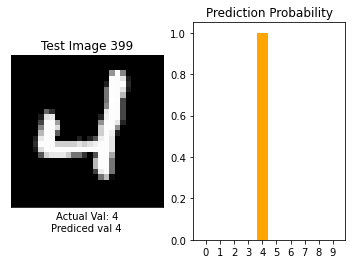

In [82]:
test_img_pred(399)

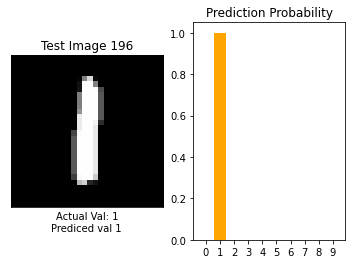

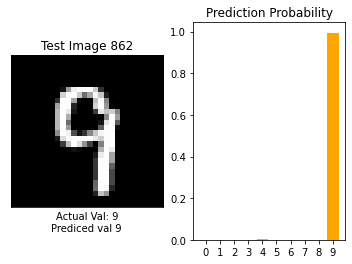

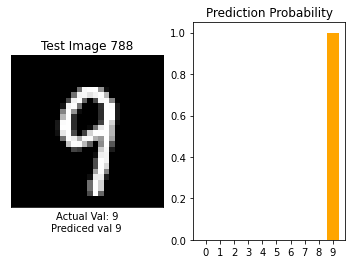

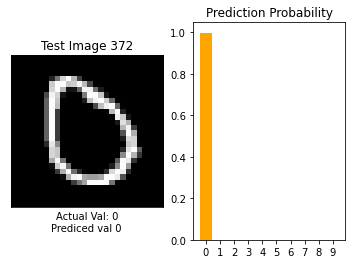

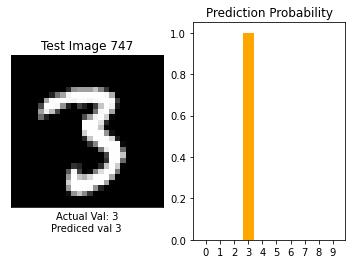

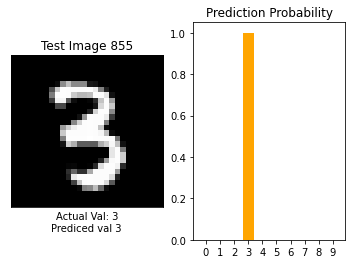

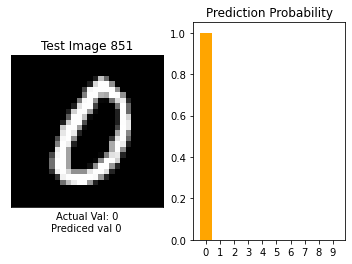

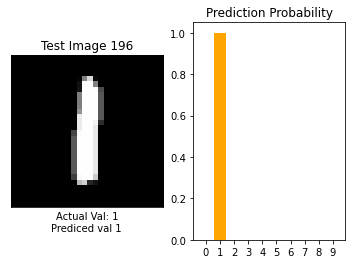

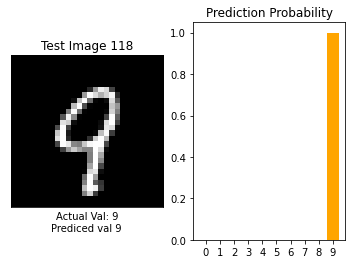

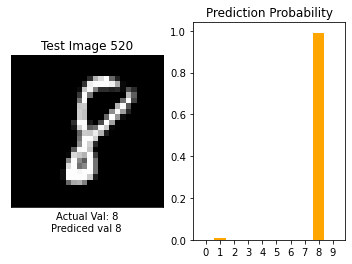

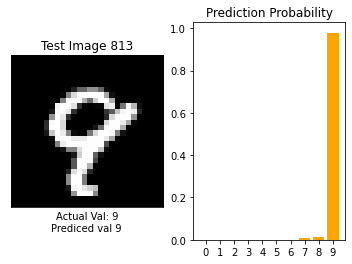

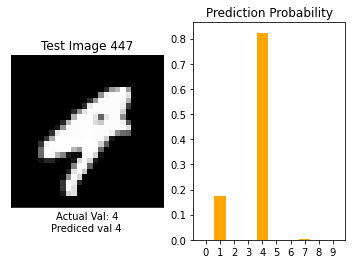

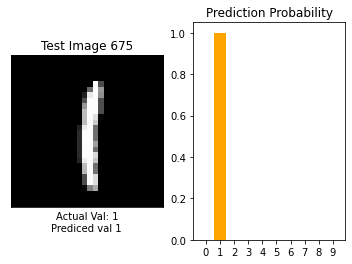

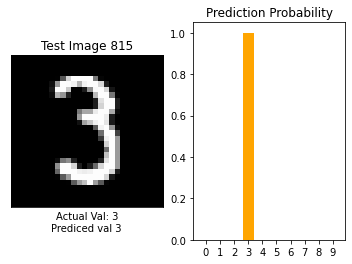

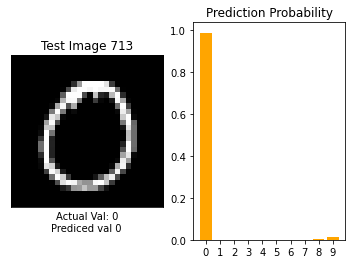

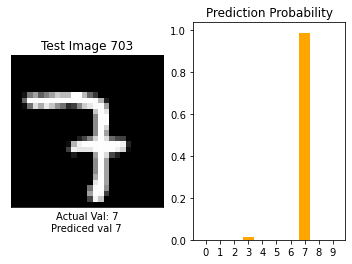

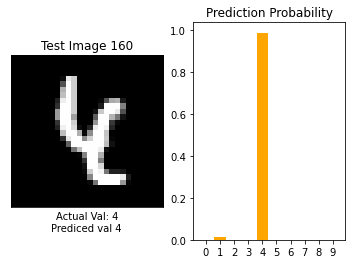

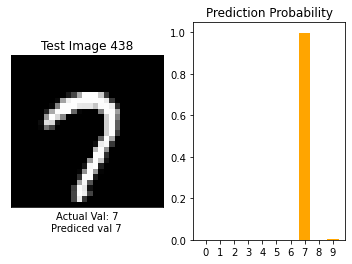

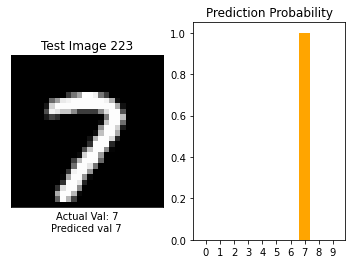

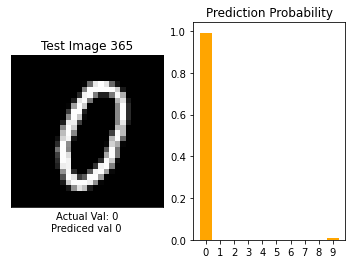

In [83]:
for i in np.random.randint(100,900,20):
    test_img_pred(i)

### Practice datasets

In [ ]:
#### CIFAR10

# Different categories
# airplane
# automobile
# bird
# cat
# deer
# dog
# frog
# horse
# ship
# truck

In [88]:
(x_tr2,y_tr2),(x_te2,y_te2) = cifar10.load_data()
print(x_tr2.shape) # 60000 images with 28*28 as (height and width)
print(x_te2.shape)
print(y_tr2.shape)
print(y_te2.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


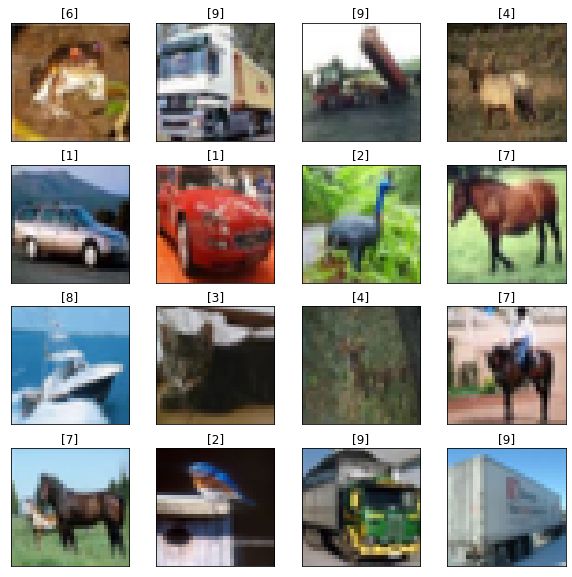

In [90]:
plt.figure(figsize=(10,10))
for i in range(16):  # i=0,1,2,...,15
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_tr2[i])
    plt.title(y_tr2[i])
plt.show()

In [85]:
from tensorflow.keras.datasets import fashion_mnist, cifar10

In [86]:
(x_tr1,y_tr1),(x_te1,y_te1) = fashion_mnist.load_data()
print(x_tr1.shape) # 60000 images with 28*28 as (height and width)
print(x_te1.shape)
print(y_tr1.shape)
print(y_te1.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


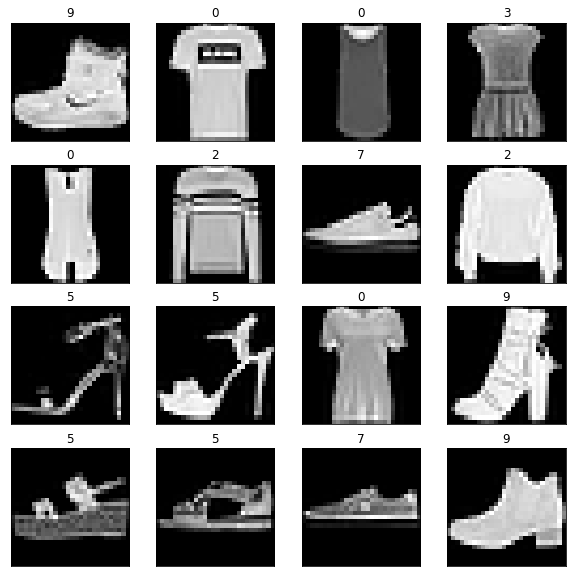

In [87]:
plt.figure(figsize=(10,10))
for i in range(16):  # i=0,1,2,...,15
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_tr1[i],'gray')
    plt.title(y_tr1[i])
plt.show()

In [ ]:
#### Fashion MNIST

# Different categories
# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot
